##### Questoin > Supervisor > LLM Or RAG 

In [21]:
pip install duckduckgo_search langchain_groq sentence_transformers faiss-cpu pydantic python-dotenv pypdf bs4 langchain langchain_core langchain-community langchain_huggingface langchain_google_genai langchain-pinecone langgraph langchain-openai langchain_groq langchain_google_genai google-generativeai  pymupdf wikipedia arxiv defusedxml  youtube_search langchain-tavily langgraph chromadb


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached duckduckgo_search-8.0.4-py3-none-any.whl.metadata (16 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
INFO: pip is looking at multiple versions of google-generativeai to determine which version is compatible with other requirements. This could take a while.
  Using cached google_generativeai-0.8.4-py3-none-any.whl.metadata (4.2 kB)
  Using cached google_generativeai-0.8.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_generativeai-0.8.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_generativeai-0.8.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_generativeai-0.8.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_generativeai-0.7.2-py3-none-any.whl.metadata (4.0 kB)
  Using cached google_generativeai-0.7.1-py3-none-any.whl.metadata (3.9 kB)
INFO: pip is still looking at multiple versions of google-generativeai to determine which version is compatible with other requirements. This could take a while.
  Using

In [8]:
#### import
import os
from dotenv import load_dotenv
from langgraph.graph import Graph
from IPython.display import Image, display
load_dotenv()


True

In [42]:
#from langchain_google_genai import ChatGoogleGenerativeAI
#model=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash')
from langchain_groq import ChatGroq
llm= ChatGroq(
    model="deepseek-r1-distill-llama-70b",
    temperature=0
    )
response=llm.invoke("what is length of wall of china?")
print(response.content)

<think>
Okay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of miles, but I'm not certain. Let me try to break this down.

First, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or 21,000 kilometers. But I'm not sure which one is accurate.

I should consider the sources of this information. Maybe some people measure it differently. For example, if you include all the branches and sections, it might add up to a longer distance. But if you just take the main wall, it might be shorter. I think the Chinese government did a survey a while back, so that might be a reliable source.

Wait, I think they used advanced technology like GPS and satellites to measure it more accurately. That would make

#### Configure the embdeeing Model

In [10]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("Hi"))

/Users/anvvsharma/anvv/ws/agenticai/vagenticai/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


384

##### Lets take a Data embedd it and store in Vector Database

In [178]:
##### Imports
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
import operator
from langchain_core.tools import tool
from langchain.tools import tool
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import StateGraph,END,MessagesState,START
from langgraph.prebuilt import ToolNode


##### 
#####   ``` THis is my Custom Tool ```


In [46]:


@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

###### Importing the inbuilt tool

In [47]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

search.invoke("what is the latest update on iphone17 release?")


"Some iPhone 17 models (maybe even all of them) will have a new camera bump, a wide rectangular raised area that stretches across the phone similar in style to Google's Pixel line. According to a ... Planned for September 2025, the iPhone 17 models could feature larger display sizes, ProMotion across the lineup, Wi-Fi 7, and more. We're still in the middle of the iPhone 16 release cycle, but ... New iPhone 17 colors. Rumors of a new color for the iPhone started in April, when Twitter user and leaker Majin Bu (not the Dragon Ball Z character) posted that the iPhone 17 Pro and Pro Max could ... • The iPhone 17's display may not match what the Pro model offers. • iOS 26, Apple's iPhone software update for later this year, got a preview at WWDC. • The iPhone 17 could support a new ... The iPhone 17 lineup brings significant technological improvements across design, performance, and functionality. Apple's latest innovations focus on enhanced displays, powerful processing capabilities, and a

In [48]:
tools=[multiply, add, divide, search]

In [49]:
llm_with_tools=llm.bind_tools(tools)

In [54]:
response = llm_with_tools.invoke("hi")

In [59]:
response

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 392, 'total_tokens': 504, 'completion_time': 0.78840365, 'prompt_time': 0.032049707, 'queue_time': 0.053921103, 'total_time': 0.820453357}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--d7717bfa-5eb3-4fdb-a294-8a7254187243-0', usage_metadata={'input_tokens': 392, 'output_tokens': 112, 'total_tokens': 504})

In [57]:
response.tool_calls

[]

In [58]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x167197c40>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x15749de40>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x1671940e0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backen

In [62]:
tool_node=ToolNode(tools)

In [67]:
response = llm_with_tools.invoke("what is 10/2")
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 's1mb1kt5r', 'function': {'arguments': '{"a":10,"b":2}', 'name': 'divide'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 259, 'prompt_tokens': 397, 'total_tokens': 656, 'completion_time': 1.098474375, 'prompt_time': 0.033425431, 'queue_time': 0.054530328999999995, 'total_time': 1.131899806}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--854548b7-3155-44fa-8cd3-876480ed16d7-0', tool_calls=[{'name': 'divide', 'args': {'a': 10, 'b': 2}, 'id': 's1mb1kt5r', 'type': 'tool_call'}], usage_metadata={'input_tokens': 397, 'output_tokens': 259, 'total_tokens': 656})

In [68]:
response.tool_calls

[{'name': 'divide',
  'args': {'a': 10, 'b': 2},
  'id': 's1mb1kt5r',
  'type': 'tool_call'}]

#### Define workflow

In [60]:
response = llm_with_tools.invoke("what is a current age fo the TATA Group")

In [61]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'TATA Group founding year'},
  'id': 'f6h2kbmzp',
  'type': 'tool_call'}]

In [115]:
SYSTEM_PROMPT = "you are a helful assistant tasked with using searcha nd performing arithemitic on a set of inputs "

In [117]:
# messages: Annotated[list[AnyMessAge], add_messages]

## dummmy query 
user_query = ["tell me what is 2+2"]

In [118]:
[SYSTEM_PROMPT]+user_query

['you are a helful assistant tasked with using searcha nd performing arithemitic on a set of inputs ',
 'tell me what is 2+2']

In [119]:
def function_1(state:MessagesState):
    user_question = state["messages"]
    input_question = [SYSTEM_PROMPT]+user_question
    response = llm_with_tools.invoke(input_question)

    return {
        "messages" : [response]
    }

In [120]:
from langgraph.prebuilt import ToolNode
builder = StateGraph(MessagesState)
## add nodes 
builder.add_node("llm_decision_step", function_1)
## add another node with all my tools
builder.add_node("tools", ToolNode(tools))
## add the edge for decision
builder.add_edge(START, "llm_decision_step")



In [108]:
from langgraph.prebuilt import tools_condition
## inbuild router condition from langgraph
builder.add_conditional_edges("llm_decision_step", tools_condition,)


In [109]:
## add loop for the tool
builder.add_edge("tools", "llm_decision_step")

In [110]:
react_graph = builder.compile()

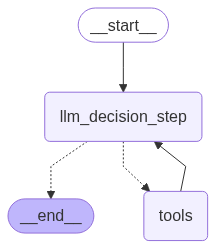

In [111]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

##### Testing the App

In [123]:
message = [HumanMessage(content="what is 2 times of anrendraamodi's aga ?")]

In [151]:
response = react_graph.invoke({"messages": message})
response


{'messages': [HumanMessage(content='what is the speed of light in m/s and multiply it by 10 ?', additional_kwargs={}, response_metadata={}, id='4f50c340-34f4-457e-87fd-a16bc1c73137'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'hvfbbf9hn', 'function': {'arguments': '{"query":"speed of light in m/s"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 415, 'prompt_tokens': 431, 'total_tokens': 846, 'completion_time': 1.509090909, 'prompt_time': 0.027633734, 'queue_time': 0.287862676, 'total_time': 1.536724643}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_9009120237', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c0e8400e-0c20-4379-be19-e37775d4a78b-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'speed of light in m/s'}, 'id': 'hvfbbf9hn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 431, 'output_tokens': 415, 'total_tokens': 846}),
  ToolM

In [152]:
message = [HumanMessage(content="How much is the net worth of elon musk and divided by 2 ?")]
response = react_graph.invoke({"messages": message})
response

{'messages': [HumanMessage(content='How much is the net worth of elon musk and divided by 2 ?', additional_kwargs={}, response_metadata={}, id='2e73f7f2-2081-45e1-81a3-3abcc749e4da'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'p2krhpe41', 'function': {'arguments': '{"query":"Elon Musk net worth 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 211, 'prompt_tokens': 432, 'total_tokens': 643, 'completion_time': 0.767272727, 'prompt_time': 0.02771736, 'queue_time': 0.28143963099999997, 'total_time': 0.794990087}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_87ec4d1ec3', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--363f4f73-00da-44fb-86af-539aa8575894-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Elon Musk net worth 2023'}, 'id': 'p2krhpe41', 'type': 'tool_call'}], usage_metadata={'input_tokens': 432, 'output_tokens': 211, 'total_tokens': 6

In [153]:
message = [HumanMessage(content="what is the speed of light in m/s and multiply it by 10 ?")]
response = react_graph.invoke({"messages": message})
response

{'messages': [HumanMessage(content='what is the speed of light in m/s and multiply it by 10 ?', additional_kwargs={}, response_metadata={}, id='ad9245de-80dd-4f3f-a2f7-61b257dade63'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'm8jkf26zw', 'function': {'arguments': '{"query":"speed of light in m/s"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 415, 'prompt_tokens': 431, 'total_tokens': 846, 'completion_time': 1.509090909, 'prompt_time': 0.02771801, 'queue_time': 0.27927069, 'total_time': 1.536808919}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_87ec4d1ec3', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d088ff5e-25bb-43da-89df-77dc0a1a6cab-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'speed of light in m/s'}, 'id': 'm8jkf26zw', 'type': 'tool_call'}], usage_metadata={'input_tokens': 431, 'output_tokens': 415, 'total_tokens': 846}),
  ToolMes

In [155]:
##### Final Answer 

for m in response["messages"]:
    m.pretty_print()


================================ Human Message =================================

what is the speed of light in m/s and multiply it by 10 ?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (m8jkf26zw)
 Call ID: m8jkf26zw
  Args:
    query: speed of light in m/s
================================= Tool Message =================================
Name: duckduckgo_search

The speed of light in vacuum, commonly denoted c, is a universal physical constant exactly equal to 299,792,458 metres per second (approximately 300,000 kilometres per second; 186,000 miles per second; 671 million miles per hour). It is exact because, by international agreement, a metre is defined as the length of the path travelled by light in vacuum during a time interval of 1⁄299 792 458 ... Learn what is the speed of light in a vacuum and how it affects physics and space travel. Find out how to measure distances in light-years and what is faster than light. 

In [138]:
pip install yfinance

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 25.5 MB/s eta 0:00:0000:010:01
Using cached pycparser-2.22-py3-none-any.whl (117 kB)
  Created wheel for peewee: filename=peewee-3.18.1-cp313-cp313-macosx_11_0_arm64.whl size=270299 sha256=60e531016f3e7e8f2ec975ba11cd1e2bca07455954fa70db4e32bbb1abbc6c43
  Stored in directory: /Users/anvvsharma/Library/Caches/pip/wheels/91/08/75/7ec051c4c2b139cc4aa3a4ae6059d80900c301473b215aad59
Successfully built peewee

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages

In [167]:
import yfinance as yf
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"

In [168]:
get_stock_price("AAPL")

'The last closing price of AAPL was $199.20.'

In [169]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $319.11.'

In [170]:
tools

[StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x15749de40>),
 StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x167197c40>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x1671940e0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backen

In [171]:
tools = [add, multiply, divide, search, get_stock_price]

In [172]:
llm_with_tools.bind_tools(tools)

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x1575d4510>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x1575d4e90>, model_name='deepseek-r1-distill-llama-70b', temperature=1e-08, model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'add', 'description': 'Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'multiply', 'description': 'Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'objec

In [173]:
response=llm_with_tools.invoke("can you give me a latest stock price of adani greens?")

In [174]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'latest stock price of Adani Greens'},
  'id': 'zw0nbx9xr',
  'type': 'tool_call'}]

In [179]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [183]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph2 = workflow.compile()

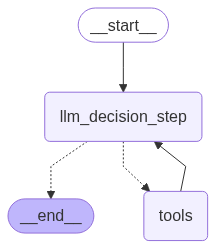

In [184]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))


In [185]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [186]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (0gt2g9jcm)
 Call ID: 0gt2g9jcm
  Args:
    query: current stock price of Apple
================================= Tool Message =================================
Name: duckduckgo_search

Historical Stock Price Lookup. Investor Relations > Stock Price . Apple Footer See today's Apple stock price (NASDAQ: AAPL), related news, stock ratings, valuation, dividends and more to help you make your investing decisions. Analyst Forecast. According to 36 analysts, the average rating for AAPL stock is "Buy." The 12-month stock price forecast is $237.36, which is an increase of 17.12% from the latest price. Should You Buy or Sell Apple Stock? Get The Latest AAPL Stock Analysis, Price Target, Dividend Info, Headlines, and Short Interest at MarketBeat. ... Current 

In [187]:
messages = [HumanMessage(content="can you give me 2 times of current stock price of Apple with the latest news of the Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [188]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

can you give me 2 times of current stock price of Apple with the latest news of the Apple.
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (690znvw33)
 Call ID: 690znvw33
  Args:
    query: current stock price of Apple
================================= Tool Message =================================
Name: duckduckgo_search

Get Apple Inc (AAPL.O) real-time stock quotes, news, price and financial information from Reuters to inform your trading and investments ... Price To Cash Flow (Per Share TTM) 25.43. Total Debt ... Historical Stock Price Lookup. Investor Relations > Stock Price . Apple Footer Analyst Forecast. According to 36 analysts, the average rating for AAPL stock is "Buy." The 12-month stock price forecast is $237.36, which is an increase of 17.12% from the latest price. A high-level overview of Apple Inc. (AAPL) stock. View (AAPL) r